In [1]:
#importing necessary python packages
import pandas as pd
import numpy as np

In [2]:
data=pd.read_csv("HR_comma_sep.csv")

In [3]:
data.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [38]:
#Starting the EDA
#1.	Perform data quality checks by checking for missing values, if any

In [4]:
data.info() #no missing values are present here

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   sales                  14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [5]:
#renaming sales column to Department
data.rename(columns={"sales": "Department"}, inplace=True)

In [6]:
data["Department"].unique()

array(['sales', 'accounting', 'hr', 'technical', 'support', 'management',
       'IT', 'product_mng', 'marketing', 'RandD'], dtype=object)

In [7]:
import seaborn as sns

In [8]:
#2.	Understand what factors contributed most to employee turnover at EDA.

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

'\nhighest correlation is between average_monthly_hours and number_project columns\n'

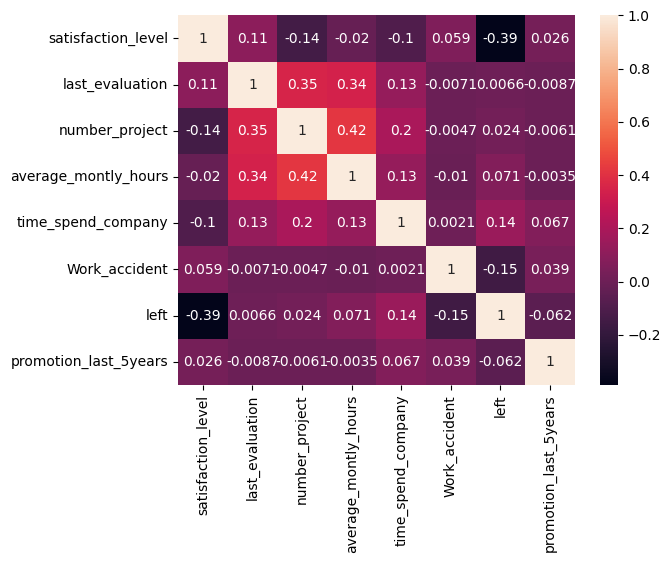

In [10]:
#2.1.	Draw a heatmap of the correlation matrix between all numerical features or columns in the data.
correlationMatrix = data.corr(numeric_only = True)
sns.heatmap(correlationMatrix, annot=True)
"""
highest correlation is between average_monthly_hours and number_project columns
"""

In [ ]:
"""
2.2.	Draw the distribution plot of:
■	Employee Satisfaction (use column satisfaction_level)
■	Employee Evaluation (use column last_evaluation)
■	Employee Average Monthly Hours (use column average_montly_hours)

"""

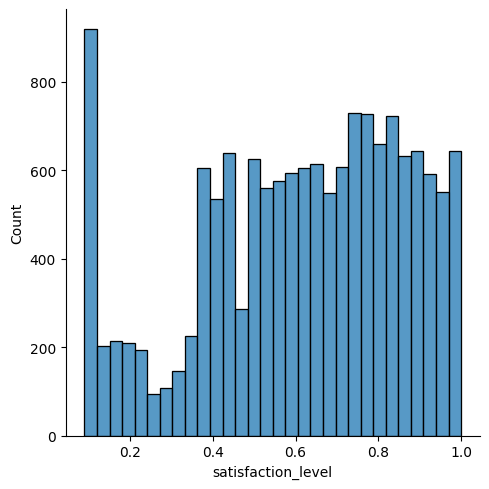

In [11]:
sns.displot(data['satisfaction_level']) #this means mostly employees have 0.2

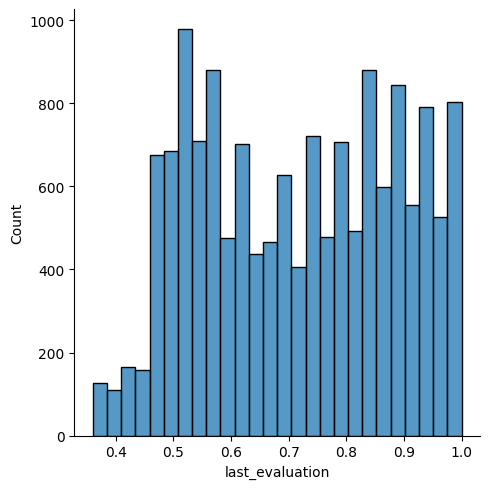

In [12]:
sns.displot(data['last_evaluation'])

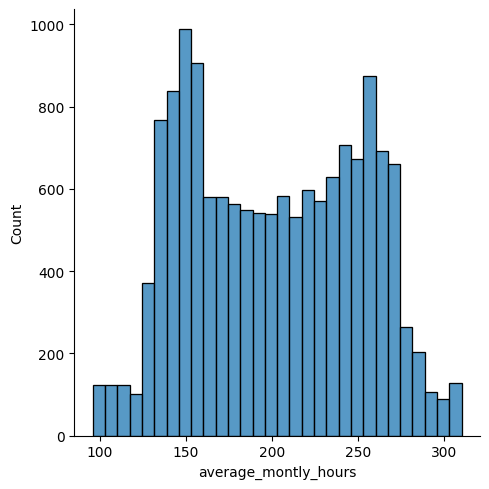

In [13]:
sns.displot(data['average_montly_hours']) # maximum number of employees are working 150 hours a month

In [14]:
"""
2.3.	Draw the bar plot of the employee project count of both employees who left
and stayed in the organization (use column number_project and hue column left),
and give your inferences from the plot.
"""

'\n2.3.\tDraw the bar plot of the employee project count of both employees who left\nand stayed in the organization (use column number_project and hue column left),\nand give your inferences from the plot.\n'

'\n0-> means stayed in the company, 1-left the company\nEmployees who are involved in 3-4 projects have mostly stayed in the company\nAll the employees who were involved in 7 projects have left the company\n\nOverall -\n1)If employess are involved in less than 3 projects then chances of those employees leaving is high.\n2)If employess are involved in more than 5 projects then chances of those employees leaving is high.\n'

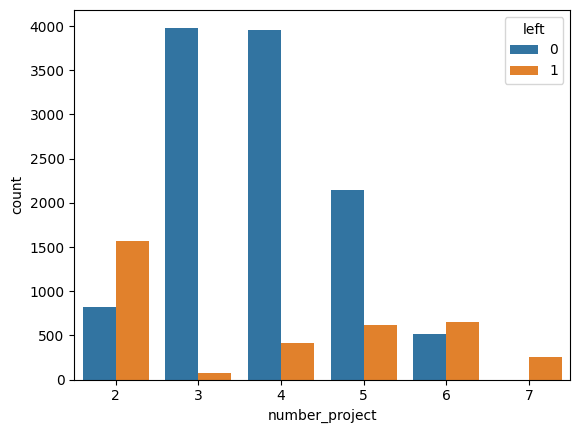

In [15]:
sns.countplot(data, x='number_project', hue='left')
"""
0-> means stayed in the company, 1-left the company
Employees who are involved in 3-4 projects have mostly stayed in the company
All the employees who were involved in 7 projects have left the company

Overall -
1)If employess are involved in less than 3 projects then chances of those employees leaving is high.
2)If employess are involved in more than 5 projects then chances of those employees leaving is high.
"""

In [16]:
"""
3.	Perform clustering of employees who left based on their satisfaction and evaluation.
3.1.	Choose columns satisfaction_level, last_evaluation, and left.
3.2.	Do K-means clustering of employees who left the company into 3 clusters?
3.3.	Based on the satisfaction and evaluation factors, give your thoughts on the employee clusters.

"""

'\n3.\tPerform clustering of employees who left based on their satisfaction and evaluation.\n3.1.\tChoose columns satisfaction_level, last_evaluation, and left.\n3.2.\tDo K-means clustering of employees who left the company into 3 clusters?\n3.3.\tBased on the satisfaction and evaluation factors, give your thoughts on the employee clusters.\n\n'

In [17]:
dataset=data[['satisfaction_level', 'last_evaluation','left']]  #all are numerical cols

In [18]:
dataset_new=dataset[dataset['left']==1]

In [19]:
dataset_new.head()

,satisfaction_level,last_evaluation,left
0,0.38,0.53,1
1,0.80,0.86,1
2,0.11,0.88,1
3,0.72,0.87,1
4,0.37,0.52,1


In [20]:
features = dataset_new.iloc[:,[0,1]].values

In [21]:
features

array([[0.38, 0.53],
       [0.8 , 0.86],
       [0.11, 0.88],
       ...,
       [0.37, 0.53],
       [0.11, 0.96],
       [0.37, 0.52]])

In [22]:
from sklearn.cluster import KMeans

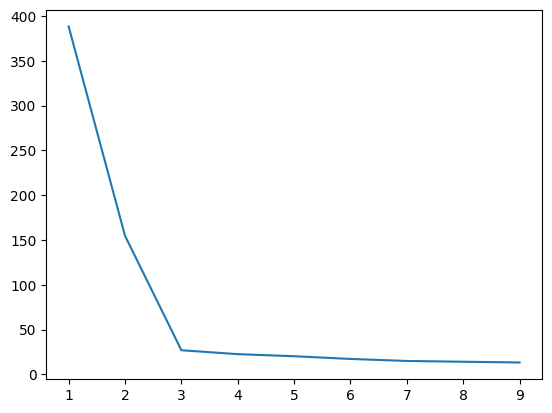

In [23]:
wcss=[]

for category in range(1,10):
  model = KMeans(n_clusters=category, random_state=2)
  model.fit(features)
  wcss.append(model.inertia_)

plt.plot(range(1,10), wcss)

In [25]:
#Model Building
finalModel3Clusters = KMeans(n_clusters=3)
finalModel3Clusters.fit(features)

KMeans(n_clusters=3)

In [26]:
#Reveal the labels
labels = finalModel3Clusters.predict(features)

In [27]:
labels

array([2, 1, 0, ..., 2, 0, 2])

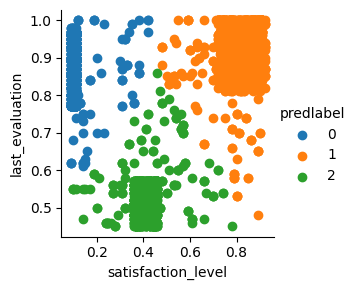

In [28]:
finalDataset =dataset_new.iloc[:,[0,1]]
finalDataset['predlabel']=labels

import seaborn as sns
sns.FacetGrid(finalDataset, hue='predlabel').map(plt.scatter, 'satisfaction_level' , 'last_evaluation').add_legend()

In [ ]:
"""
Thoughts on the above clustering:
There are three types of Employees who left the company:
1)Those who have very good rating in their evaluation but very low satisfaction level.
2)Those who have low rating in their evaluation and have medium satisfaction level.
3)Those  who have very good rating in their evaluation and high satisfaction level.

Out of these three categories most employees fall in the number3) category as we can see a higher concentration
of dots.These means there must be some other factor that impacted their decision to leave the company
"""

In [ ]:
#4.	Handle the left Class Imbalance using the SMOTE technique


In [ ]:
"""
4.1.	Pre-process the data by converting categorical columns to numerical columns by:
■	Separating categorical variables and numeric variables
■	Applying get_dummies() to the categorical variables
■	Combining categorical variables and numeric variables

"""

In [29]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [30]:
# Deal with Categorical Data
# Department
pd.get_dummies(data['Department'] , dtype=int)

,IT,RandD,accounting,hr,management,marketing,product_mng,sales,support,technical
0,0,0,0,0,0,0,0,1,0,0
1,0,0,0,0,0,0,0,1,0,0
2,0,0,0,0,0,0,0,1,0,0
3,0,0,0,0,0,0,0,1,0,0
4,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...
14994,0,0,0,0,0,0,0,0,1,0
14995,0,0,0,0,0,0,0,0,1,0
14996,0,0,0,0,0,0,0,0,1,0
14997,0,0,0,0,0,0,0,0,1,0


In [31]:
dataset = pd.concat([ data.iloc[:,[0,1,2,3,4,5,6,7]], pd.get_dummies(data['Department'] , dtype=int)] , axis = 1)  #Concat @ column level

In [32]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 18 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   IT                     14999 non-null  int32  
 9   RandD                  14999 non-null  int32  
 10  accounting             14999 non-null  int32  
 11  hr                     14999 non-null  int32  
 12  management             14999 non-null  int32  
 13  marketing              14999 non-null  int32  
 14  product_mng            14999 non-null  int32  
 15  sa

In [33]:
data[['salary']]

,salary
0,low
1,medium
2,medium
3,low
4,low
...,...
14994,low
14995,low
14996,low
14997,low


In [34]:
finalDataset = pd.concat([ dataset.iloc[:,[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17]], pd.get_dummies(data['salary'] , dtype=int)] , axis = 1)  #Concat @ column level

In [35]:
finalDataset.info() #has all numerical data now

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 21 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   IT                     14999 non-null  int32  
 9   RandD                  14999 non-null  int32  
 10  accounting             14999 non-null  int32  
 11  hr                     14999 non-null  int32  
 12  management             14999 non-null  int32  
 13  marketing              14999 non-null  int32  
 14  product_mng            14999 non-null  int32  
 15  sa

In [36]:
"""
4.2.	Do the stratified split of the dataset to train and test in the ratio 80:20 with random_state=123.
"""

'\n4.2.\tDo the stratified split of the dataset to train and test in the ratio 80:20 with random_state=123.\n'

In [37]:
#figuring out the label and feature columns:
#Label - left is the label colum
#Features - all other columns are features
features=finalDataset.iloc[:,[0,1,2,3,4,5,7,8,9,10,11,12,13,14,15,16,17,18,19,20]].values
label=finalDataset.iloc[:,[6]].values

In [38]:
label

array([[1],
       [1],
       [1],
       ...,
       [1],
       [1],
       [1]], dtype=int64)

In [39]:
from sklearn.model_selection import train_test_split

In [40]:
X_train,X_test,y_train,y_test = train_test_split(features,
                                                   label,
                                                   test_size=0.2,
                                                   random_state=123)

In [ ]:
"""
4.3.	Upsample the train dataset using the SMOTE technique from the imblearn module.
"""

In [41]:
from imblearn.over_sampling import SMOTE

In [42]:
#checking for imbalance
finalDataset.left.value_counts()

left
0    11428
1     3571
Name: count, dtype: int64

In [43]:
smoteObject = SMOTE(random_state=1)

In [44]:
resampledFeatures, resampledLabel = smoteObject.fit_resample(features,label)

In [45]:
X_train,X_test,y_train,y_test = train_test_split(resampledFeatures,
                                                  resampledLabel,
                                                   test_size=0.2,
                                                   random_state=123)

In [ ]:
#5.	Perform 5-fold cross-validation model training and evaluate performance.

In [ ]:
"""
5.1.	Train a logistic regression model, apply a 5-fold CV, and plot the classification report.
"""

In [46]:
import warnings
warnings.filterwarnings("ignore")

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

In [ ]:
#Note-we will use sampled-features and sampled-label dataset that we created in balancing the dataset using SMOTE

In [47]:
model_LR = LogisticRegression()

scores = cross_val_score(model_LR,
                         resampledFeatures, resampledLabel,
                         cv=5)

In [48]:
scores

array([0.77165354, 0.78691752, 0.7856049 , 0.7796981 , 0.73769416])

In [49]:
#benchmark score

print(f"Minimum Score Threshold is: {scores.mean()}")
print(f"Suggested SL : {1 - scores.mean()}")

Minimum Score Threshold is: 0.772313644561658
Suggested SL : 0.22768635543834204


In [50]:
#Optimal Score
print(f"Optimal Score possible for given dataset is : {scores.max()}")

Optimal Score possible for given dataset is : 0.7869175235178298


In [51]:
#Using CL=0.769
# To extract the best training sample,

CL = 0.769

#Step1: Initialize the algo

from sklearn.linear_model import LogisticRegression
model_LR = LogisticRegression()

#Step2: Initialize K-Fold Cross validation
from sklearn.model_selection import KFold

kfold = KFold(n_splits=5,        #This is the cv value u declared in cross_val_score
              shuffle=True,
              random_state=1) #This random state is to help me reproduce the same output

iterationNo=0

for trainIndex,testIndex in kfold.split(resampledFeatures):
  iterationNo += 1
  X_train,X_test = resampledFeatures[trainIndex], resampledFeatures[testIndex]
  y_train,y_test = resampledLabel[trainIndex], resampledLabel[testIndex]

  model_LR.fit(X_train,y_train)

  if model_LR.score(X_test,y_test) >= CL:
    print(f"TestScore {model_LR.score(X_test,y_test)} and Train Score {model_LR.score(X_train,y_train)} for iteration {iterationNo}")



TestScore 0.7744969378827646 and Train Score 0.7851673594399475 for iteration 1
TestScore 0.7722598993655655 and Train Score 0.779874213836478 for iteration 2
TestScore 0.7869175235178298 and Train Score 0.780530489472245 for iteration 3
TestScore 0.7947932618683001 and Train Score 0.7770850423844682 for iteration 4
TestScore 0.7726974403850361 and Train Score 0.7797648345638502 for iteration 5


In [ ]:
# choosing this - TestScore 0.7958871144169766 and Train Score 0.7783429040196883 for iteration 4

In [52]:
# To extract the best training sample,

CL = 0.769

#Step1: Initialize the algo

from sklearn.linear_model import LogisticRegression
model_LR = LogisticRegression()

#Step2: Initialize K-Fold Cross validation
from sklearn.model_selection import KFold

kfold = KFold(n_splits=5,        #This is the cv value u declared in cross_val_score
              shuffle=True,
              random_state=1) #This random state is to help me reproduce the same output

iterationNo=0

for trainIndex,testIndex in kfold.split(resampledFeatures):
  iterationNo += 1
  if iterationNo == 4:
    X_train,X_test = resampledFeatures[trainIndex], resampledFeatures[testIndex]
    y_train,y_test = resampledLabel[trainIndex], resampledLabel[testIndex]
    break


In [53]:
#creating the final model based on best train data
model_LR = LogisticRegression()
model_LR.fit(X_train,y_train)

trainScore = model_LR.score(X_train,y_train)
testScore = model_LR.score(X_test,y_test)

In [54]:
testScore

0.7947932618683001

In [55]:
trainScore

0.7770850423844682

In [56]:
from sklearn.metrics import classification_report
print(classification_report(resampledLabel,model_LR.predict(resampledFeatures)))

#since this is now a balanced dataset after smote, we shall use accuracy
# accuracy is 0.78 > CL ==> model is approved.

              precision    recall  f1-score   support

           0       0.80      0.75      0.77     11428
           1       0.77      0.81      0.79     11428

    accuracy                           0.78     22856
   macro avg       0.78      0.78      0.78     22856
weighted avg       0.78      0.78      0.78     22856



In [ ]:
#5.2.	Train a Random Forest Classifier model, apply the 5-fold CV, and plot the classification report.

In [57]:
from sklearn.ensemble import RandomForestClassifier

In [58]:
model_RFC = RandomForestClassifier()

scores = cross_val_score(model_RFC,
                         resampledFeatures, resampledLabel,
                         cv=5)

In [59]:
scores

array([0.9768154 , 0.99693721, 0.99540582, 0.99562459, 0.9925618 ])

In [60]:
#benchmark score

print(f"Minimum Score Threshold is: {scores.mean()}")
print(f"Suggested SL : {1 - scores.mean()}")

Minimum Score Threshold is: 0.9914689645417599
Suggested SL : 0.008531035458240077


In [61]:
#Optimal Score
print(f"Optimal Score possible for given dataset is : {scores.max()}")

Optimal Score possible for given dataset is : 0.996937212863706


In [62]:
#Using CL= 0.99
# To extract the best training sample,

CL =  0.99

#Step1: Initialize the algo

from sklearn.ensemble import RandomForestClassifier
model_RFC = RandomForestClassifier()

#Step2: Initialize K-Fold Cross validation
from sklearn.model_selection import KFold

kfold = KFold(n_splits=5,        #This is the cv value u declared in cross_val_score
              shuffle=True,
              random_state=1) #This random state is to help me reproduce the same output

iterationNo=0

for trainIndex,testIndex in kfold.split(resampledFeatures):
  iterationNo += 1
  X_train,X_test = resampledFeatures[trainIndex], resampledFeatures[testIndex]
  y_train,y_test = resampledLabel[trainIndex], resampledLabel[testIndex]

  model_RFC.fit(X_train,y_train)

  if model_RFC.score(X_test,y_test) >= CL:
    print(f"TestScore {model_RFC.score(X_test,y_test)} and Train Score {model_RFC.score(X_train,y_train)} for iteration {iterationNo}")



TestScore 0.9938744257274119 and Train Score 0.9999453103636861 for iteration 2
TestScore 0.9938744257274119 and Train Score 1.0 for iteration 3
TestScore 0.9927805731787355 and Train Score 1.0 for iteration 4
TestScore 0.9903740975716473 and Train Score 1.0 for iteration 5


In [63]:
# choosing this - TestScore 0.9936556552176766 and Train Score 1.0 for iteration 3

In [64]:
# To extract the best training sample,

CL = 0.99

#Step1: Initialize the algo

from sklearn.ensemble import RandomForestClassifier
model_RFC = RandomForestClassifier()

#Step2: Initialize K-Fold Cross validation
from sklearn.model_selection import KFold

kfold = KFold(n_splits=5,        #This is the cv value u declared in cross_val_score
              shuffle=True,
              random_state=1) #This random state is to help me reproduce the same output

iterationNo=0

for trainIndex,testIndex in kfold.split(resampledFeatures):
  iterationNo += 1
  if iterationNo == 3:
    X_train,X_test = resampledFeatures[trainIndex], resampledFeatures[testIndex]
    y_train,y_test = resampledLabel[trainIndex], resampledLabel[testIndex]
    break


In [65]:
#creating the final model based on best train data
model_RFC = RandomForestClassifier()
model_RFC.fit(X_train,y_train)

trainScore = model_RFC.score(X_train,y_train)
testScore = model_RFC.score(X_test,y_test)

In [66]:
testScore

0.9943119667468825

In [67]:
trainScore

1.0

In [68]:
from sklearn.metrics import classification_report
print(classification_report(resampledLabel,model_RFC.predict(resampledFeatures)))

#since this is now a balanced dataset after smote, we shall use accuracy
# accuracy is 1.00 > CL ==> model is approved.

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     11428
           1       1.00      1.00      1.00     11428

    accuracy                           1.00     22856
   macro avg       1.00      1.00      1.00     22856
weighted avg       1.00      1.00      1.00     22856



In [ ]:
#5.3.	Train a Gradient Boosting Classifier model, apply the 5-fold CV, and plot the classification report

In [149]:
from xgboost import XGBClassifier

In [203]:
model_XGB = XGBClassifier()

scores = cross_val_score(model_XGB,
                         resampledFeatures, resampledLabel,
                         cv=5)

In [204]:
scores

array([0.97922135, 0.9925618 , 0.99365566, 0.99431197, 0.98993656])

In [205]:
#benchmark score

print(f"Minimum Score Threshold is: {scores.mean()}")
print(f"Suggested SL : {1 - scores.mean()}")

Minimum Score Threshold is: 0.989937465703464
Suggested SL : 0.01006253429653603


In [206]:
#Optimal Score
print(f"Optimal Score possible for given dataset is : {scores.max()}")

Optimal Score possible for given dataset is : 0.9943119667468825


In [207]:
#Using CL=0.99
# To extract the best training sample,

CL = 0.99

#Step1: Initialize the algo

from xgboost import XGBClassifier
model_XGB = XGBClassifier()

#Step2: Initialize K-Fold Cross validation
from sklearn.model_selection import KFold

kfold = KFold(n_splits=5,        #This is the cv value u declared in cross_val_score
              shuffle=True,
              random_state=1) #This random state is to help me reproduce the same output

iterationNo=0

for trainIndex,testIndex in kfold.split(resampledFeatures):
  iterationNo += 1
  X_train,X_test = resampledFeatures[trainIndex], resampledFeatures[testIndex]
  y_train,y_test = resampledLabel[trainIndex], resampledLabel[testIndex]

  model_XGB.fit(X_train,y_train)

  if model_XGB.score(X_test,y_test) >= CL:
    print(f"TestScore {model_XGB.score(X_test,y_test)} and Train Score {model_XGB.score(X_train,y_train)} for iteration {iterationNo}")



TestScore 0.9903762029746281 and Train Score 0.9978122949026471 for iteration 1
TestScore 0.9925618026690002 and Train Score 0.996609242548537 for iteration 2
TestScore 0.9903740975716473 and Train Score 0.9974295870932458 for iteration 3


In [ ]:
# choosing this - TestScore 0.9925618026690002 and Train Score 0.996609242548537 for iteration 2

In [208]:
# To extract the best training sample,

CL =  0.99

#Step1: Initialize the algo

from xgboost import XGBClassifier
model_XGB = XGBClassifier()

#Step2: Initialize K-Fold Cross validation
from sklearn.model_selection import KFold

kfold = KFold(n_splits=5,        #This is the cv value u declared in cross_val_score
              shuffle=True,
              random_state=1) #This random state is to help me reproduce the same output

iterationNo=0

for trainIndex,testIndex in kfold.split(resampledFeatures):
  iterationNo += 1
  if iterationNo == 2:
    X_train,X_test = resampledFeatures[trainIndex], resampledFeatures[testIndex]
    y_train,y_test = resampledLabel[trainIndex], resampledLabel[testIndex]
    break


In [209]:
#creating the final model based on best train data
model_XGB = XGBClassifier()
model_XGB.fit(X_train,y_train)

trainScore = model_XGB.score(X_train,y_train)
testScore = model_XGB.score(X_test,y_test)

In [210]:
testScore

0.9925618026690002

In [211]:
trainScore

0.996609242548537

In [212]:
from sklearn.metrics import classification_report
print(classification_report(resampledLabel,model_XGB.predict(resampledFeatures)))

#since this is now a balanced dataset after smote, we shall use accuracy
# accuracy is 1.00 > CL ==> model is approved.

              precision    recall  f1-score   support

           0       0.99      1.00      1.00     11428
           1       1.00      0.99      1.00     11428

    accuracy                           1.00     22856
   macro avg       1.00      1.00      1.00     22856
weighted avg       1.00      1.00      1.00     22856



In [ ]:
#6.	Identify the best model and justify the evaluation metrics used.

In [ ]:
#6.1.	Find the ROC/AUC for each model and plot the ROC curve.

In [213]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

AUC: 0.781851592579629


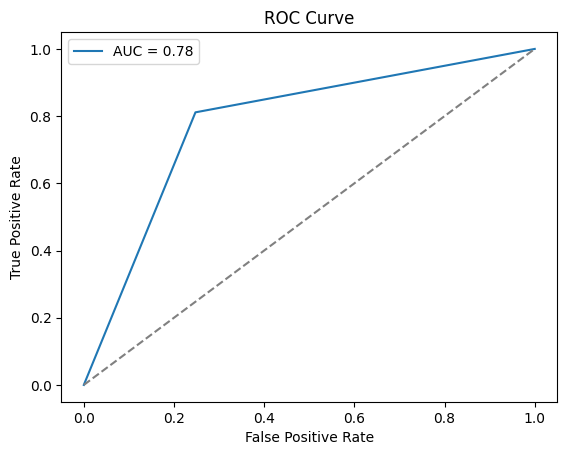

In [214]:
# Compute ROC curve for Logistic Regression Model
fpr, tpr, thresholds = roc_curve(resampledLabel, model_LR.predict(resampledFeatures))

# Compute AUC
auc = roc_auc_score(resampledLabel, model_LR.predict(resampledFeatures))
print("AUC:", auc)

# Plot ROC curve
plt.plot(fpr, tpr, label=f"AUC = {auc:.2f}")
plt.plot([0, 1], [0, 1], linestyle="--", color="gray")  # random baseline
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()


AUC: 0.9986874343717186


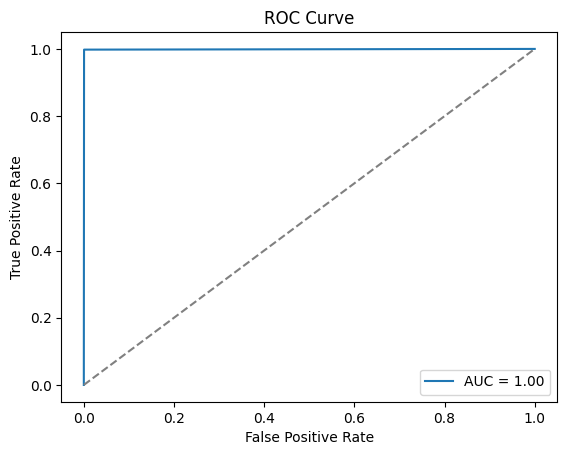

In [215]:
# Compute ROC curve for Random Forest Classifier Model
fpr, tpr, thresholds = roc_curve(resampledLabel, model_RFC.predict(resampledFeatures))

# Compute AUC
auc = roc_auc_score(resampledLabel, model_RFC.predict(resampledFeatures))
print("AUC:", auc)

# Plot ROC curve
plt.plot(fpr, tpr, label=f"AUC = {auc:.2f}")
plt.plot([0, 1], [0, 1], linestyle="--", color="gray")  # random baseline
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()


AUC: 0.9957997899894995


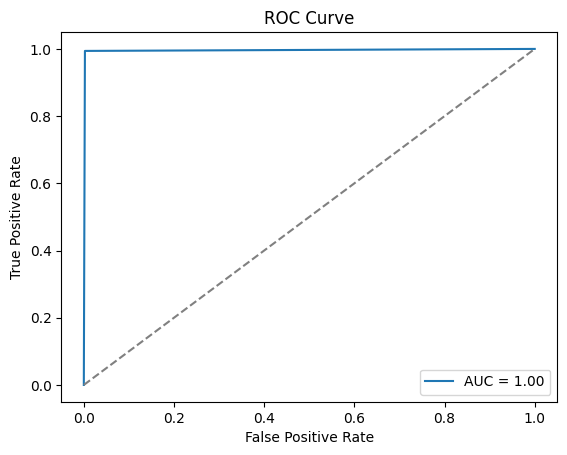

In [216]:
# Compute ROC curve for Random XGBoost Classifier Model
fpr, tpr, thresholds = roc_curve(resampledLabel, model_XGB.predict(resampledFeatures))

# Compute AUC
auc = roc_auc_score(resampledLabel, model_XGB.predict(resampledFeatures))
print("AUC:", auc)

# Plot ROC curve
plt.plot(fpr, tpr, label=f"AUC = {auc:.2f}")
plt.plot([0, 1], [0, 1], linestyle="--", color="gray")  # random baseline
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()


In [ ]:
#from these plots we can conclude that Random Forest Classifier gives the best model the curve is sharp towards top left
#and has the highest AUC value

In [ ]:
#6.2.	Find the confusion matrix for each of the models.

In [217]:
from sklearn.metrics import confusion_matrix

In [221]:
confusion_matrix(resampledLabel, model_LR.predict(resampledFeatures))

array([[8599, 2829],
       [2157, 9271]])

In [222]:
confusion_matrix(resampledLabel, model_RFC.predict(resampledFeatures))

array([[11422,     6],
       [   24, 11404]])

In [223]:
confusion_matrix(resampledLabel, model_XGB.predict(resampledFeatures))

array([[11400,    28],
       [   68, 11360]])

In [ ]:
#based on the confusion matrix - Random Forest calssifier is the best model -
#as the wrong predictions are less ( 6 and 24 respectively)

In [ ]:
#6.3.	Explain which metric needs to be used from the confusion matrix: Recall or Precision?

"""
We need to use Recall:
Use Recall when missing a positive case is costly. Example: Employee turnover prediction →
If HR misses employees who are likely to leave (false negatives), they lose talent unexpectedly.
Better to catch as many potential leavers as possible, even if some predictions are false alarms.

From the confusion matrix, Recall is the more critical metric for employee turnover prediction,
because the cost of missing true leavers (false negatives) is higher than the cost of false alarms.
"""

In [ ]:
#7.	Suggest various retention strategies for targeted employees.

In [224]:
#7.1.	Using the best model, predict the probability of employee turnover in the test data.

In [ ]:
#using RFC

In [226]:
# To extract the best training sample

#Step2: Initialize K-Fold Cross validation
from sklearn.model_selection import KFold

kfold = KFold(n_splits=5,        #This is the cv value u declared in cross_val_score
              shuffle=True,
              random_state=1) #This random state is to help me reproduce the same output

iterationNo=0

for trainIndex,testIndex in kfold.split(resampledFeatures):
  iterationNo += 1
  if iterationNo == 3:
    X_train,X_test = resampledFeatures[trainIndex], resampledFeatures[testIndex]
    y_train,y_test = resampledLabel[trainIndex], resampledLabel[testIndex]
    break


In [227]:
y_pred_proba = model_RFC.predict_proba(X_test)[:, 1]

In [228]:
y_pred_proba

array([1.  , 1.  , 1.  , ..., 0.99, 1.  , 1.  ])

In [ ]:
# 7.2.	Based on the probability score range below, categorize the employees into four zones and suggest your thoughts on the retention strategies for each zone.
# ■	Safe Zone (Green) (Score < 20%)
# ■	Low-Risk Zone (Yellow) (20% < Score < 60%)
# ■	Medium-Risk Zone (Orange) (60% < Score < 90%)
# ■	High-Risk Zone (Red) (Score > 90%).


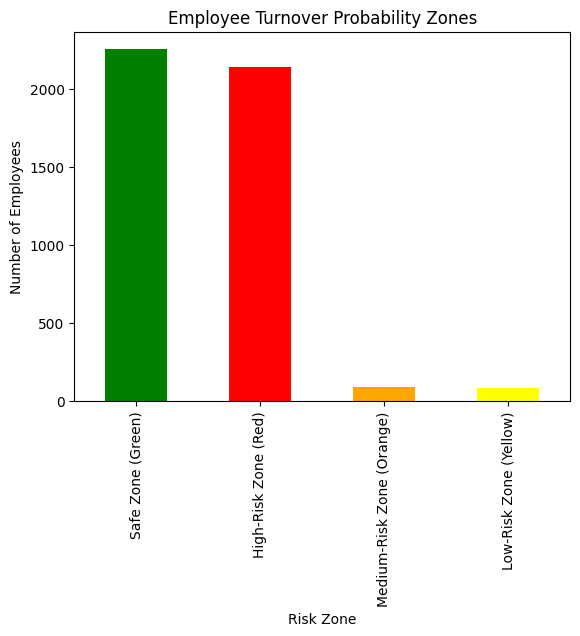

In [229]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Define zones
def categorize_zone(p):
    if p < 0.2:
        return "Safe Zone (Green)"
    elif p < 0.6:
        return "Low-Risk Zone (Yellow)"
    elif p < 0.9:
        return "Medium-Risk Zone (Orange)"
    else:
        return "High-Risk Zone (Red)"

zones = [categorize_zone(p) for p in y_pred_proba]

# Count employees in each zone
zone_counts = pd.Series(zones).value_counts()

# Plot
colors = {
    "Safe Zone (Green)": "green",
    "Low-Risk Zone (Yellow)": "yellow",
    "Medium-Risk Zone (Orange)": "orange",
    "High-Risk Zone (Red)": "red"
}

zone_counts.plot(kind="bar", color=[colors[z] for z in zone_counts.index])
plt.title("Employee Turnover Probability Zones")
plt.xlabel("Risk Zone")
plt.ylabel("Number of Employees")
plt.show()


In [ ]:
# If most employees are in the Green Zone, HR can focus on maintaining satisfaction.

# If many are in Orange/Red Zones, HR should prioritize retention strategies (interventions, promotions, workload balance).